## seaborn:关系数据图。界面显示中文及其他函数测试。

内容介绍：这是一种基本的数据图，具体的函数参数如下：

Help on function relplot in module seaborn.relational:

relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)

relplot()函数是一种基本的数据图，散点图（scatterplot）和折线图（lineplot）就是建立在relplot基础之上。relplot默认显示散点图。
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 网络加载官方案例数据
# tips = sns.load_dataset('tips')

#使用本地数据加载
tips = pd.read_csv('seaborn-data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
idx = {
    'total_bill':'账单总额',
    'tip':'小费',
    'sex':'顾客性别', 
    'smoker':'是否吸烟',
    'day':'用餐日期', 
    'time':'用餐时间', 
    'size':'用餐人数'
}
df = tips.copy()
#使用map函数+字典，形成新的columns
df.columns = df.columns.map(idx)
df.head()

,账单总额,小费,顾客性别,是否吸烟,用餐日期,用餐时间,用餐人数
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
#使用unique()函数显示用餐时间的单一值
df['用餐时间'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [29]:
df['顾客性别'].unique()

array(['Female', 'Male'], dtype=object)

In [33]:
df['用餐日期'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [39]:
dic_day = dict(zip(df['用餐日期'].unique(), ['星期日','星期六','星期四','星期五']))

In [40]:
print(dic_day)

{'Sun': '星期日', 'Sat': '星期六', 'Thur': '星期四', 'Fri': '星期五'}


In [42]:
time_type={'Dinner':'晚餐', 'Lunch':'午餐'}
df2 = df.copy()
df2['用餐类别'] = df2['用餐时间'].map(time_type) 
the_sex = {'Female':'女', 'Male':'男'}
df2['顾客性别'] = df2['顾客性别'].map(the_sex) 
df2['用餐日期'] = df2['用餐日期'].map(dic_day) 
df2.head()

,账单总额,小费,顾客性别,是否吸烟,用餐日期,用餐时间,用餐人数,用餐类别
0,16.99,1.01,女,No,星期日,Dinner,2,晚餐
1,10.34,1.66,男,No,星期日,Dinner,3,晚餐
2,21.01,3.50,男,No,星期日,Dinner,3,晚餐
3,23.68,3.31,男,No,星期日,Dinner,2,晚餐
4,24.59,3.61,女,No,星期日,Dinner,4,晚餐


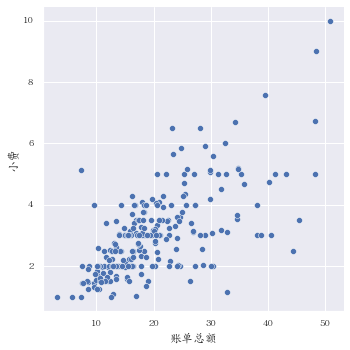

In [12]:
#需要显示中文时，指定下面的参数
# import matplotlib.pyplot as plt，引入matplotlib库底层修改
# 如果使用ubuntu或其他linux系统，可以搜索是否存在与matplotlib共用的字体
# 存在共用字体的，作为参数传给plt.rcParams['font.sans-serif'] ，此处为'AR PL UKai CN'(ubuntu)
plt.rcParams['font.sans-serif'] = ['AR PL UKai CN']
#绘图的基本方法，设置x和y轴的列数据值为列名称即可。data参数为数据源名称。
sns.relplot(x='账单总额', y='小费', data=df)

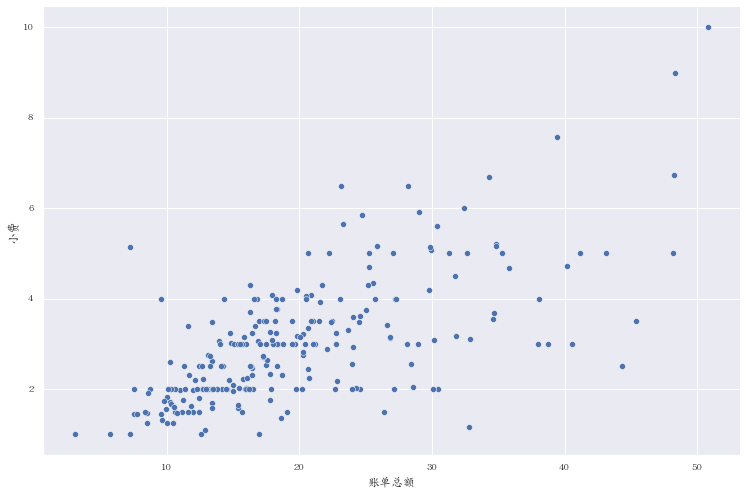

In [19]:
#设置图像的大小height、aspect(width=aspect * height)参数
sns.set(color_codes=True)
plt.rcParams['font.sans-serif'] = ['AR PL UKai CN']
sns.relplot(x='账单总额', y='小费', data=df, height=7, aspect=1.5)

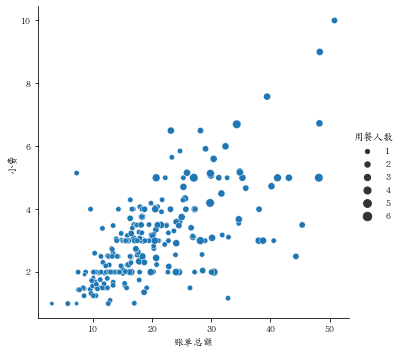

In [11]:
#绘图的基本方法，设置x和y轴的列数据值为列名称即可。data参数为数据源名称。
#size参数可以把数据显示散点的大小。
sns.relplot(x='账单总额', y='小费', data=df,  size='用餐人数')

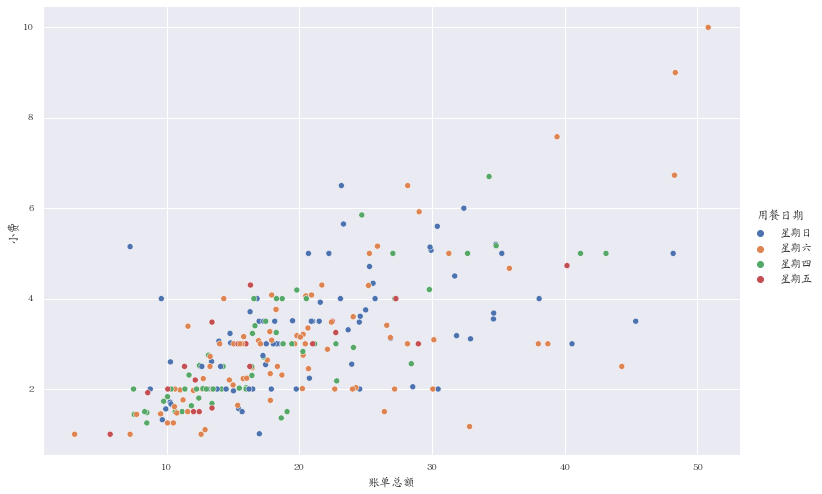

In [43]:
#hue参数，增加数据列，并显示为不同颜色
sns.relplot(x='账单总额', y='小费', data=df2,  hue='用餐日期', height=7, aspect=1.5)

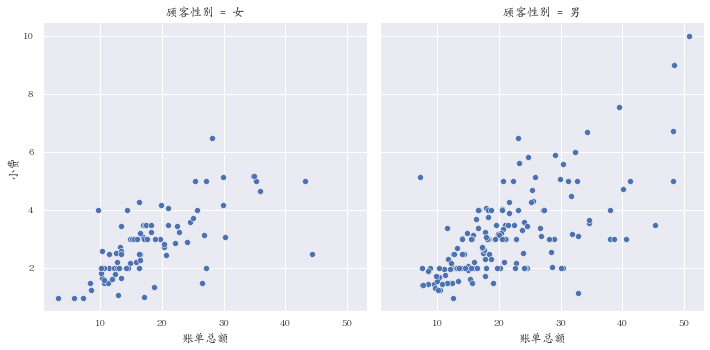

In [45]:
#col/row参数，添加不同的数据列后，将数据图形分不同的列或行排列
#分组的原则是，按照列数据中聚合后的不同组别
sns.relplot(x='账单总额', y='小费', data=df2, col='顾客性别')

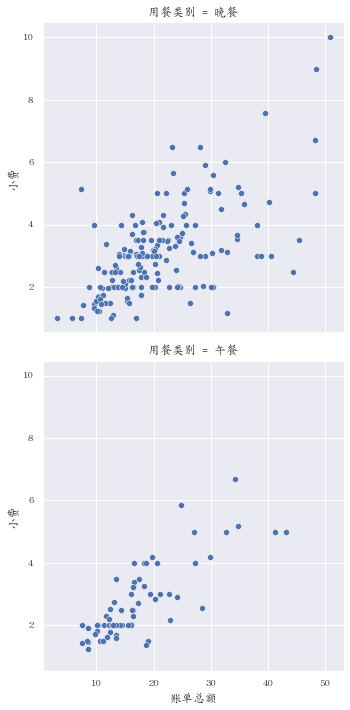

In [47]:
# 添加row参数为time时的情况
sns.relplot(x='账单总额', y='小费', data=df2,  row='用餐类别')

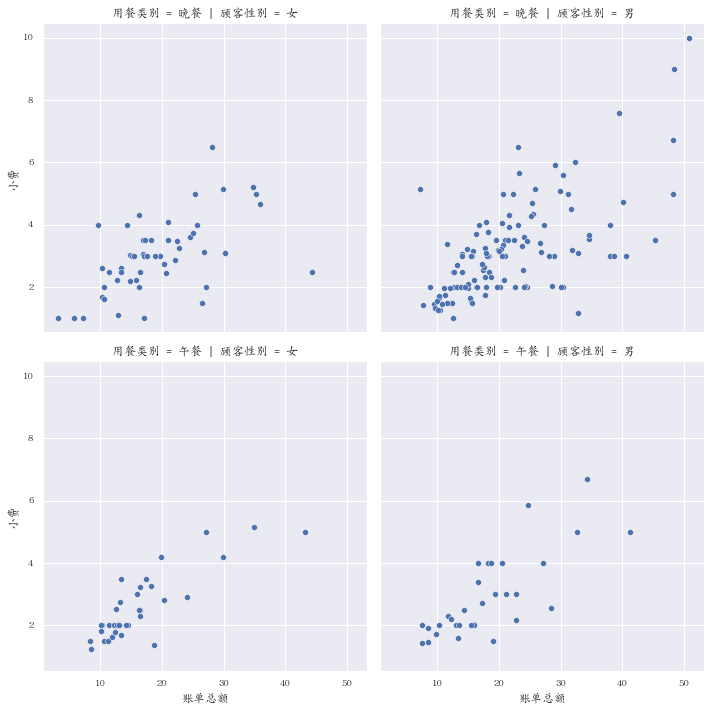

In [48]:
#row/col参数可以同时添加
sns.relplot(x='账单总额', y='小费', data=df2,  row='用餐类别' , col='顾客性别')

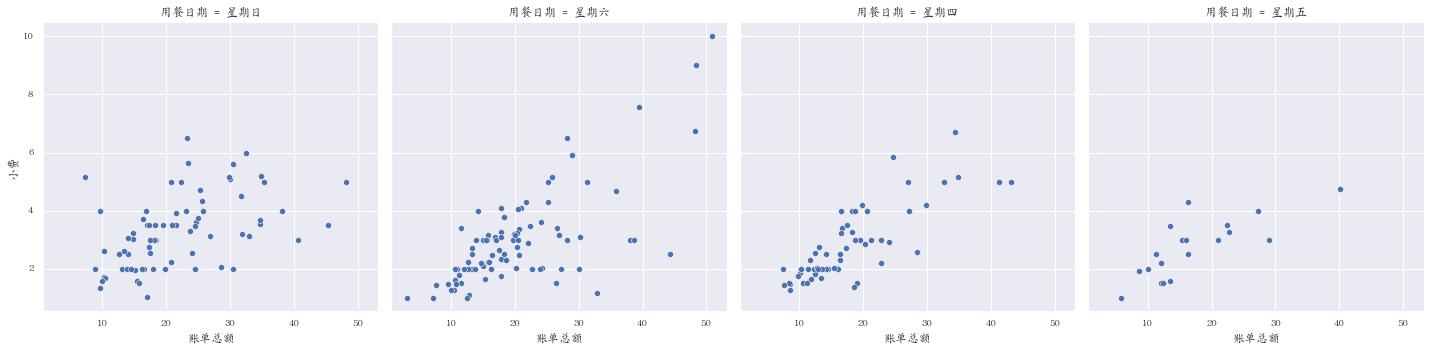

In [49]:
#同一行中分图过多的换行操作
sns.relplot(x='账单总额', y='小费', data=df2,   col='用餐日期')

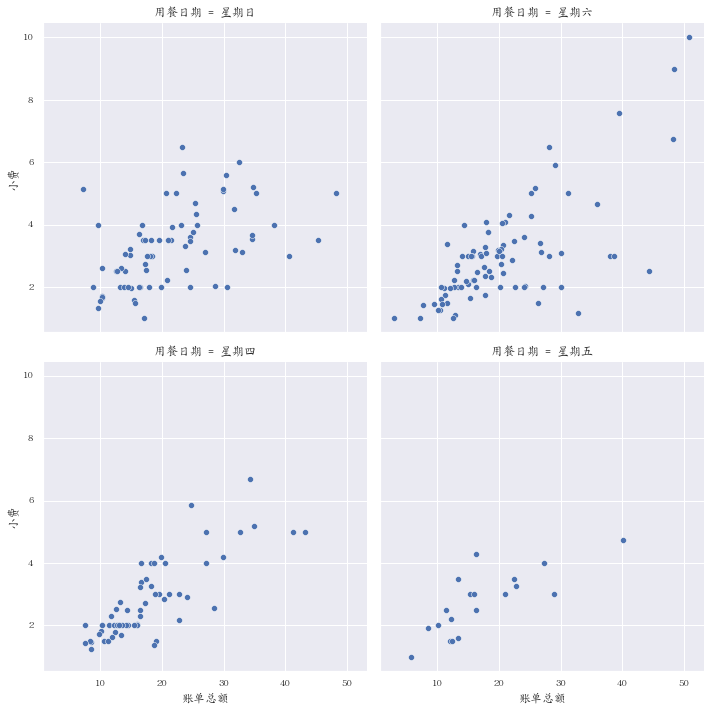

In [50]:
#上面的图像中有四个分图。如果图像再多时，可以尝试换行，使用col_wrap=2函数(每行2个)
sns.relplot(x='账单总额', y='小费', data=df2,   col='用餐日期',col_wrap=2)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

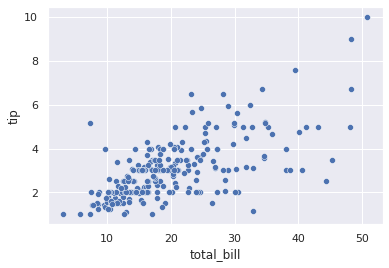

In [18]:
#首先设置颜色盘。设置后美化图形，也可不设置。颜色盘调用后在jupyter notebook中设置了全局变量，之后所有图形都会有颜色设置。
sns.set(color_codes=True)
#scatterplot和relplot之间的关系
#scatterplot调用relplot
#relplot默认为scatterplot
sns.scatterplot(x='total_bill', y='tip', data=tips)

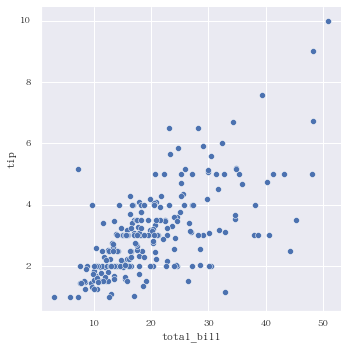

In [16]:
#relplot中的kind参数传入'scatter'也为scatterplot
sns.relplot(x='total_bill', y='tip', data=tips,kind='scatter')

In [15]:
help(sns.relplot)

Help on function relplot in module seaborn.relational:

relplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, units=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-spe